# RIFF

In [2]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")

[]

In [3]:
OHCO = ['artist', 'song','lines', 'token_num']
colors = 'YlGnBu'
WORDS = OHCO[:4]
LINES = OHCO[:3]
SONG = OHCO[:2]
ARTIST = OHCO[:1]
BAG = SONG
colors = "YlGnBu"
tf_agg = 'sum'

## IMPORT

In [4]:
import pandas as pd
import numpy as np

In [5]:
import plotly_express as px
import seaborn as sns; sns.set()
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [6]:
TOKENS = pd.read_csv('tokens.csv').set_index(OHCO).sort_index()
VOCAB = pd.read_csv('vocab.csv').set_index('term_str').sort_index()
LIB = pd.read_csv('lib.csv').set_index('artist').sort_index()
BOW = pd.read_csv('bow_by_artists.csv').set_index(['artist','term_str']).sort_index()

In [7]:
LIB

,nationality,genre,decade_of_prominence,birth_year,instruments,character_count
artist,,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059


In [8]:
get_tfidf = lambda X, agg_func='sum': (X.T / X.T.agg(agg_func)).T * (np.log2(len(X)/X.astype('bool').sum()))

In [13]:
TFIDF = get_tfidf(BOW.n.unstack(fill_value=0), tf_agg)

In [14]:
TFIDF

term_str,1,10,130,14,16,180,2,20,2020,213,...,yourself,youu8197,youu8287,youuc0u8197,youuc0u8287,yuh,yuletide,z,zion,zone
artist,,,,,,,,,,,,,,,,,,,,,
ADELE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AMY WINEHOUSE,0.000000,0.000000,0.000000,0.000318,0.000000,0.000318,0.000000,0.000000,0.000000,0.000000,...,0.001671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARIANA GRANDE,0.000000,0.000000,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000224,0.000000,...,0.000221,0.000000,0.000000,0.000000,0.000000,0.006049,0.000000,0.000000,0.000000,0.000000
BEYONCE,0.000000,0.000000,0.000000,0.000000,0.032032,0.000000,0.034712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CYNDI LAUPER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013989,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOLLY PARTON,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DUA LIPA,0.026446,0.000000,0.000000,0.000000,0.000000,0.000000,0.020156,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAURYN HILL,0.018084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025437,0.000000
PINK,0.000000,0.003341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Pythagorean, AKA Euclidean

In [26]:
sample_terms = "lover strong dance night day so why where who he him happy tears man woman".split()

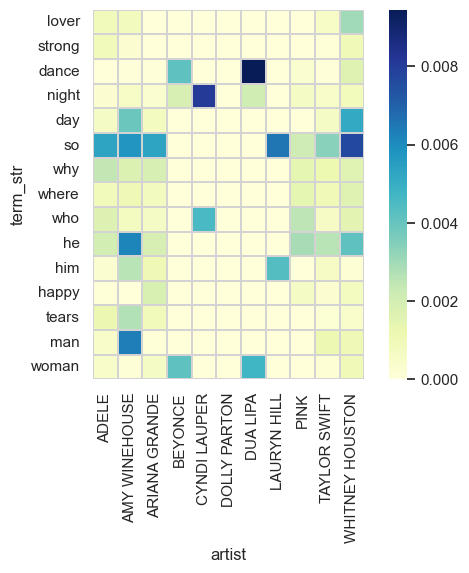

In [27]:
sns.heatmap(L1[sample_terms].T, cmap=colors, linewidth=.01, linecolor="lightgray", square=True);

## DOC PAIR TABLE

In [28]:
# Create dataframe with cartesian product of books by books
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()

# Keep only unique pairs of different books
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])

# Name index cols
PAIRS.index.names = ['doc_a', 'doc_b']

In [30]:
PAIRS.shape
PAIRS.head()

Empty DataFrame
Columns: []
Index: [(ADELE, AMY WINEHOUSE), (ADELE, ARIANA GRANDE), (ADELE, BEYONCE), (ADELE, CYNDI LAUPER), (ADELE, DOLLY PARTON)]

In [31]:
PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')  

In [35]:
PAIRS.loc['ADELE'].style.background_gradient(cmap="seismic", axis=0)

,cityblock,euclidean,cosine,jaccard,dice,js
doc_b,,,,,,
AMY WINEHOUSE,1.025944,0.041738,0.363419,0.700000,0.538462,0.562400
ARIANA GRANDE,1.025386,0.045296,0.359078,0.704443,0.543738,0.570296
BEYONCE,2.152872,0.194345,0.941892,0.964206,0.930886,0.789397
CYNDI LAUPER,1.773819,0.145757,0.939811,0.956489,0.916607,0.779435
DOLLY PARTON,1.805857,0.145292,0.932482,0.954375,0.912732,0.776830
DUA LIPA,2.231717,0.223351,0.968553,0.969265,0.940364,0.800865
LAURYN HILL,2.177466,0.182829,0.947149,0.958426,0.920171,0.785753
PINK,1.249205,0.074746,0.636325,0.835504,0.717481,0.659482
TAYLOR SWIFT,0.994970,0.034959,0.272820,0.719457,0.561837,0.552449


In [38]:
def hac(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):

    # Generate the clustering
    tree = sch.linkage(sims, method=linkage_method)
    
    # Get labels for the leaves
    labels = LIB.index.values
    
    # Create a figure 
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    
    # Create a dendrogram with the tree
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    
    # Change the appearance of ticks, tick labels, and gridlines
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 640x480 with 0 Axes>

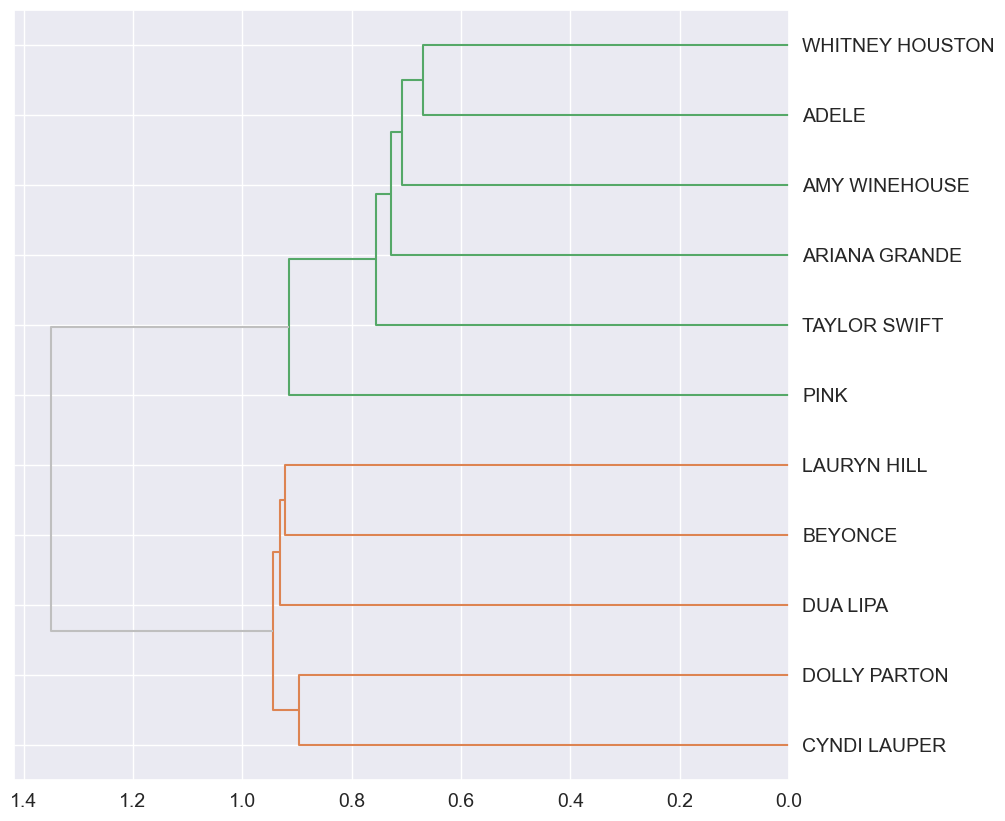

In [41]:
hac(PAIRS.jaccard, linkage_method='ward', color_thresh=1.2)